In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile 
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading Images

In [4]:
zip_object = zipfile.ZipFile(file='homer_bart_2.zip',mode='r')
zip_object.extractall('./')
zip_object.close()

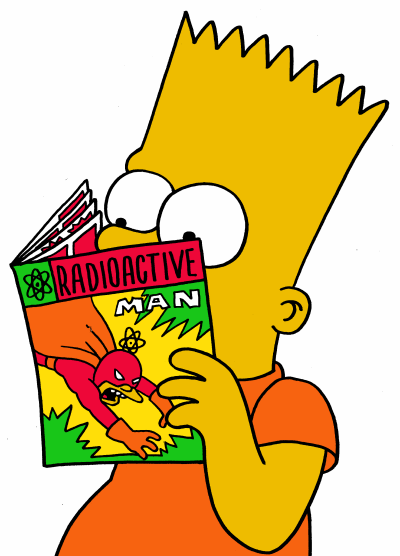

In [6]:
tf.keras.preprocessing.image.load_img('homer_bart_2\\training_set\\bart\\bart29.bmp')

Build Train and Test set

In [7]:
training_generator = ImageDataGenerator(rescale=1./255,rotation_range=7,horizontal_flip=True,zoom_range=0.2)

In [ ]:
train_dataset = training_generator.flow_from_directory("E:\\AI ML\\Gen AI\\Computer Vision\\Computer Vision Project\\homer_bart_2\\training_set",
                                                       target_size=(64,64),##normalize all images to same size for better value use 128*128
                                                       batch_size=8, ##mini batch GD will take 8 images at a time and adjust weight
                                                       class_mode='categorical', ##for 2 results we can show as binary, categorical for multiple output like blue, red, green
                                                       shuffle=True ##mix the images those 8 images so that NN don't memorize the order, and to make NN to learn the pattern not order, so it will run in random order
)

Found 215 images belonging to 2 classes.


NN automatically got the names based on the folders
Found 215 images belonging to 2 classes.

In [9]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [10]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory("E:\\AI ML\\Gen AI\\Computer Vision\\Computer Vision Project\\homer_bart_2\\test_set",
                                                  target_size = (64,64),
                                                  batch_size = 1, ##not going to train images, just going to test 1 image at a time
                                                  class_mode = 'categorical',
                                                  shuffle = False ##for testing the randomness is not required more over the end output will be based no the names of the image and shuffling might make us look different name so keep it False in test set
                                                  )

Found 54 images belonging to 2 classes.


In [18]:
network = Sequential()
network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3))) ##32 is standard value been used in NN for running it on filter
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=2,activation='softmax'))
network.summary()

e:\AI_ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 577)            │       665,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

flatten (Flatten)               │ (None, 1152)       this will be the number of input


In [ ]:
(1152+2)/2 ##will pass this neurons to the hidden layer

577.0

In [19]:
network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = network.fit(train_dataset,epochs=50)

Epoch 1/50


e:\AI_ML\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4969 - loss: 0.6916
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6686 - loss: 0.6029
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7019 - loss: 0.5743
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7715 - loss: 0.4659
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7786 - loss: 0.4112
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8215 - loss: 0.3605
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8089 - loss: 0.3277
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7915 - loss: 0.4175
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8523 - loss: 0.2895
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9142 - loss: 0.2127
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8980 - loss: 0.2824
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9335 - l

Evaluating the Neural Network

In [22]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [23]:
predictions = network.predict(test_dataset)

21/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

e:\AI_ML\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [25]:
predictions = np.argmax(predictions,axis=1) ##argmax - extract index where the max value is
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,classification_report
accuracy_score(test_dataset.classes, predictions)


0.9074074074074074

<Axes: >

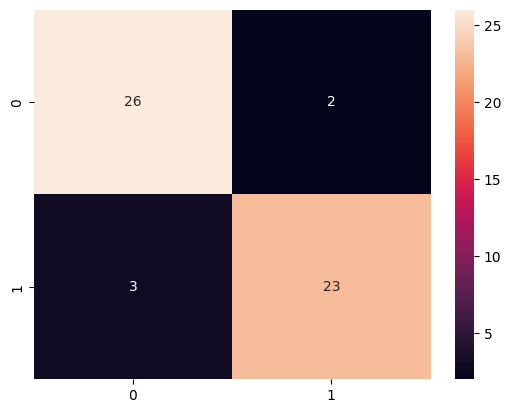

In [31]:
cm = confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm, annot=True)

In [34]:
precision_score(test_dataset.classes,predictions)

0.92

In [35]:
recall_score(test_dataset.classes,predictions)

0.8846153846153846

In [38]:
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.92      0.88      0.90        26

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



In [41]:
network.save("CNN_model.keras")

In [42]:
from tensorflow.keras.models import load_model
model = load_model("CNN_model.keras")


e:\AI_ML\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


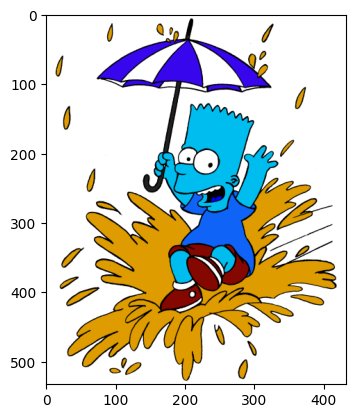

In [89]:
image = cv2.imread("homer_bart_2\\test_set\\bart\\bart25.bmp")
plt.imshow(image)

In [90]:
image = cv2.resize(image,(64,64))


In [91]:
image = image/255

In [92]:
image = image.reshape(-1,64,64,3)

In [93]:
pred = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [94]:
pred = np.argmax(pred)
pred

0

In [95]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [96]:
p = network.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [97]:
p = np.argmax(p)

In [98]:
p

0